In [2]:
import pandas as pd
import json
import numpy as np
import sys
import os
import torch

dir= os.getcwd()
sys.path.append(dir)
sys.path.append(dir.replace('/benchmark',''))
from predict import save_preds

truc=pd.read_excel(f'{dir}/deltoid.xlsx').to_dict()
del truc['Unnamed: 0']
print(truc)
deltoid=dict()
for mod in truc.keys():
    deltoid[mod]=[]
    for n,v in truc[mod].items():
        deltoid[mod].append({'subjects':str(n+1),'dice':v,'label':'deltoid'})

with open(f'{dir}/old_scripts/results/results_multi_lab.json','r') as f:
    df=json.load(f)
models=['UNet','MTL-recon-SSL-recon_u-cons-guided','MTL-recon-SSL-recon_u-final','MTL-SSL-cons-final']
labels=['infraspinatus','subscapularis','supraspinatus']
plex=df
mean_plex=dict()
std_res=dict()
for lab in labels:
    for n in range(1,11):#enumerate(list(plex.keys())):
        n=str(n)
        for model in models:#plex[n].keys():
            if model not in mean_plex.keys():
                mean_plex[model]=[]
                std_res[model]=[]
            mean_exp=[]
            for exp in plex[lab][n][model]:
                labs=[]
                # for k,v in exp.items():
                #     i#if 'lab' in k and k!='lab_0':
                #         labs.append(v)
                if exp['lab_1']>2:
                    mean_exp.append(exp['lab_1'])
                # print(labs)
                # mean_exp.append(np.mean(labs))
            # if model in mean_plex[n].keys():
            #     mean_plex[n][model]=[]
            #     std_res[n][model]=[]
            mean_plex[model].append({'subjects':n,'dice':np.mean(mean_exp),'label':lab})
            std_res[model].append({'subjects':n,'dice':np.std(mean_exp),'label':lab})

for mod in deltoid.keys():
    for v in deltoid[mod]:
        mean_plex[mod].append(v)

for i in mean_plex.keys():
    mean_plex[i]=pd.DataFrame(mean_plex[i]).pivot(index='subjects',columns='label',values='dice')
pd.concat(mean_plex.values(),axis=1,keys=mean_plex.keys()).to_excel('truc.xlsx')
# pd.DataFrame(mean_plex).pivot(index='subjects',columns='label',values='dice')

{'UNet': {0: 23.43871603, 1: 35.84800255, 2: 48.82285235, 3: 52.60238473, 4: 46.94737384, 5: 47.06875146, 6: 52.96760789, 7: 65.76747064, 8: 51.99439153, 9: 73.78497774}, 'MTL-recon-SSL-recon_u-cons-guided': {0: 31.76730569, 1: 56.19030319, 2: 66.84421704, 3: 62.79000781, 4: 59.0740952, 5: 65.47999889, 6: 60.80037728, 7: 69.21636023, 8: 55.06117726, 9: 69.34026701}, 'MTL-recon-SSL-recon_u-final': {0: 19.48911522, 1: 42.72366251, 2: 52.26756625, 3: 57.99541496, 4: 54.33137793, 5: 57.60147033, 6: 59.12298571, 7: 69.48612944, 8: 53.1198696, 9: 74.28378655}, 'MTL-SSL-cons-final': {0: 28.07267444, 1: 50.75264176, 2: 65.38896581, 3: 66.32581175, 4: 42.11737123, 5: 65.40005652, 6: 66.55297983, 7: 73.84716224, 8: 62.76122833, 9: 70.76554289}}


{'UNet': [{'subjects': 0, 'dice': 23.43871603, 'label': 'deltoid'},
  {'subjects': 1, 'dice': 35.84800255, 'label': 'deltoid'},
  {'subjects': 2, 'dice': 48.82285235, 'label': 'deltoid'},
  {'subjects': 3, 'dice': 52.60238473, 'label': 'deltoid'},
  {'subjects': 4, 'dice': 46.94737384, 'label': 'deltoid'},
  {'subjects': 5, 'dice': 47.06875146, 'label': 'deltoid'},
  {'subjects': 6, 'dice': 52.96760789, 'label': 'deltoid'},
  {'subjects': 7, 'dice': 65.76747064, 'label': 'deltoid'},
  {'subjects': 8, 'dice': 51.99439153, 'label': 'deltoid'},
  {'subjects': 9, 'dice': 73.78497774, 'label': 'deltoid'}],
 'MTL-recon-SSL-recon_u-cons-guided': [{'subjects': 0,
   'dice': 31.76730569,
   'label': 'deltoid'},
  {'subjects': 1, 'dice': 56.19030319, 'label': 'deltoid'},
  {'subjects': 2, 'dice': 66.84421704, 'label': 'deltoid'},
  {'subjects': 3, 'dice': 62.79000781, 'label': 'deltoid'},
  {'subjects': 4, 'dice': 59.0740952, 'label': 'deltoid'},
  {'subjects': 5, 'dice': 65.47999889, 'label': '

In [4]:
import matplotlib.pyplot as plt
print(mean_plex)
mean_plex=pd.DataFrame({'UNet':mean_plex})
#Sort index as integers
#Sort index as integers
mean_plex.sort_index(inplace=True)



{'1': {'UNet': 23.43871603236257}, '2': {'UNet': 35.84800255252939}, '3': {'UNet': 48.822852351583}, '4': {'UNet': 52.60238472852943}, '5': {'UNet': 46.94737384236506}, '6': {'UNet': 47.068751455621424}, '7': {'UNet': 52.96760788622377}, '8': {'UNet': 65.76747063539116}, '9': {'UNet': 51.99439152732542}, '10': {'UNet': 73.78497773705874}, '11': {'UNet': 71.69677152049567}}


/home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

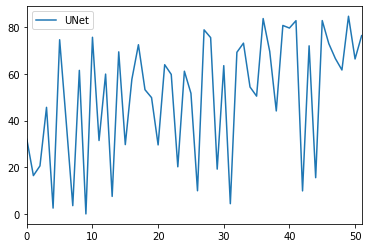

In [38]:
mean_plex.sort_index().plot()